In [4]:
# Importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# In order to to read the Ciffar data set, we must define the unpickle function: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Reading the data
data_1 = unpickle("/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py/data_batch_1")
data_2 = unpickle("/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py/data_batch_2")
data_3 = unpickle("/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py/data_batch_3")
data_4 = unpickle("/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py/data_batch_4")
data_5 = unpickle("/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py/data_batch_5")
test_batch = unpickle("/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py/test_batch")

In [8]:
#Normalizing Images
data_1_data = (data_1[b"data"].astype(float)[:,0:1024] - np.mean(data_1[b"data"].astype(float)[:,0:1024],axis=1)[:,np.newaxis])/(np.std(data_1[b"data"].astype(float)[:,0:1024], axis=1)[:, np.newaxis])
data_1_labels = data_1[b"labels"]

data_2_data = (data_2[b"data"].astype(float)[:,0:1024] - np.mean(data_2[b"data"].astype(float)[:,0:1024],axis=1)[:,np.newaxis])/(np.std(data_2[b"data"].astype(float)[:,0:1024], axis=1)[:, np.newaxis])
data_2_labels = data_2[b"labels"]

data_3_data = (data_3[b"data"].astype(float)[:,0:1024] - np.mean(data_3[b"data"].astype(float)[:,0:1024],axis=1)[:,np.newaxis])/(np.std(data_3[b"data"].astype(float)[:,0:1024], axis=1)[:, np.newaxis])
data_3_labels = data_3[b"labels"]

data_4_data = (data_4[b"data"].astype(float)[:,0:1024] - np.mean(data_4[b"data"].astype(float)[:,0:1024],axis=1)[:,np.newaxis])/(np.std(data_4[b"data"].astype(float)[:,0:1024], axis=1)[:, np.newaxis])
data_4_labels = data_4[b"labels"]

data_5_data = (data_5[b"data"].astype(float)[:,0:1024] - np.mean(data_5[b"data"].astype(float)[:,0:1024],axis=1)[:,np.newaxis])/(np.std(data_5[b"data"].astype(float)[:,0:1024], axis=1)[:, np.newaxis])
data_5_labels = data_5[b"labels"]

test_batch_data = test_batch[b"data"].astype(float)[:,0:1024]
test_batch_labels = test_batch[b"labels"]

Dimensions

In [27]:
#X: training data -> M*(D+1)
#y: training label -> M*1
#w: weight vector -> (D+1)*1
#landa: Scaler value

In [9]:
#Sigmoid function
def sigmoid(X,w):
    z = np.dot(X,w)
    return 1/(1+np.exp(-z))

#sigmoid -> M*1

In [10]:
#The Avergae Negative Likelihood Function
def AverageNegativeLog_likelihood(X, y,w,landa):
    M = len(X)
    one = np.ones((M,1))
    X = np.concatenate((X,one), axis=1)
    activation = sigmoid(X,w) 

    regularization = (landa/2)*np.dot(w.T,w)
    loss = (-1/M)*(np.dot(y.T, np.log(activation)) + np.dot((1-y).T,np.log(1-activation))) + regularization
    return loss  

#AverageNegativeLog_likelihood -> a scaler

In [11]:
#Calculate and updating gradient
def gradientL(X,y,w,landa):
    M = len(X)
    one = np.ones((M,1))
    X = np.concatenate((X,one), axis=1)
    #X: training data -> M*(D+1)
    #y: training label -> M*1
    #w: weight vector -> (D+1)*1
    grad = (1/M)*(np.dot(-(y - sigmoid(X,w)).T, X)) + landa*(w.T) 
    return grad

# gradient: a grad vector -> 1*(D+1)

In [12]:
#Defining the classes: EXP: the Airplanes are 1 and others are 0
def preprocessing (labels,selected_class):
  new_labels = []
  for i in labels:
    if i != selected_class:
      i = 0
      new_labels.append(i)
    else:
      i = 1
      new_labels.append(i)
  
  new_labels = np.array(new_labels).reshape(len(new_labels),1)
  return new_labels

In [13]:
def classifier(training_data, training_labels, selected_class, test_data, test_labels, landa, learning_rate, iter_num):
  
  #Preparing training labels for classification
  new_training_labels = preprocessing(training_labels, selected_class)
  
  #preparing the training data and initialze the weights
  y = new_training_labels
  X = training_data 
  w = np.random.rand(1025,1)
  i = 0
  
  #Updating weights
  while i < iter_num:    
    grad = gradientL(X,y,w,landa).T
    w = w - learning_rate * grad
    i = i +1

  #Preparing the test data and apply the selected weights
  M = len(test_data)
  one = np.ones((M,1))
  test_data = np.concatenate((test_data,one), axis=1)
  predicted_label = sigmoid(test_data,w)
  #predicted lables
  for i in range(0,len(predicted_label)):
    if predicted_label[i,0] <= 0.5:
      predicted_label[i,0] = 0
    else: 
      predicted_label[i,0] = 1

  #preparing the test labels and calculating confusion matrix
  new_test_labels = preprocessing(test_labels, selected_class)
  TP = 0 #TP: True positive
  FN = 0 #FN: False Negative
  FP = 0 #FP: False Positive
  TN = 0 #TN: True negative
  for i in range(0,len(new_test_labels)):
    if predicted_label[i,0] == 1:
      if new_test_labels[i,0] == 1:
        TP = TP + 1
      else:
        FP = FP + 1
      
    else:
      if new_test_labels[i,0] == 1:
        FN = FN + 1
      else:
        TN = TN + 1

  confusion_matrix = np.zeros((2,2))
  confusion_matrix[0,0] = TP
  confusion_matrix[1,0] = FP
  confusion_matrix[0,1] = FN
  confusion_matrix[1,1] = TN
  print(f"the class that we are working on: {selected_class}")
  print(f"""confusion matrix:

  {confusion_matrix}

  """)
  acc = (TP+TN) / len(new_test_labels)
  print(f"Accuracy: {acc}") 
  print("\n")
  print("\n")
  return w

In [33]:
#batch 1, Class 0-9:
Weights_1 = []
for i in range(0,10):
  w = classifier(data_1_data,data_1_labels,i,test_batch_data,test_batch_labels,0.1,0.04,10000)
  Weights_1.append(w)

the class that we are working on: 0
confusion matrix:

  [[ 538.  462.]
 [3069. 5931.]]

  
Accuracy: 0.6469




the class that we are working on: 1
confusion matrix:

  [[ 705.  295.]
 [4013. 4987.]]

  
Accuracy: 0.5692




the class that we are working on: 2
confusion matrix:

  [[ 471.  529.]
 [3068. 5932.]]

  
Accuracy: 0.6403




the class that we are working on: 3
confusion matrix:

  [[ 490.  510.]
 [3054. 5946.]]

  
Accuracy: 0.6436




the class that we are working on: 4
confusion matrix:

  [[ 513.  487.]
 [3252. 5748.]]

  
Accuracy: 0.6261




the class that we are working on: 5
confusion matrix:

  [[ 564.  436.]
 [3108. 5892.]]

  
Accuracy: 0.6456




the class that we are working on: 6
confusion matrix:

  [[ 553.  447.]
 [3216. 5784.]]

  
Accuracy: 0.6337




the class that we are working on: 7
confusion matrix:

  [[ 572.  428.]
 [3144. 5856.]]

  
Accuracy: 0.6428




the class that we are working on: 8
confusion matrix:

  [[ 733.  267.]
 [3624. 5376.]]

  
Accu

In [34]:
#batch 2, Class 0-9:
Weights_2 = []
for i in range(0,10):
  w = classifier(data_2_data,data_2_labels,i,test_batch_data,test_batch_labels,0.1,0.04,10000)
  Weights_2.append(w)


the class that we are working on: 0
confusion matrix:

  [[ 543.  457.]
 [3223. 5777.]]

  
Accuracy: 0.632




the class that we are working on: 1
confusion matrix:

  [[ 730.  270.]
 [3972. 5028.]]

  
Accuracy: 0.5758




the class that we are working on: 2
confusion matrix:

  [[ 486.  514.]
 [3045. 5955.]]

  
Accuracy: 0.6441




the class that we are working on: 3
confusion matrix:

  [[ 495.  505.]
 [3085. 5915.]]

  
Accuracy: 0.641




the class that we are working on: 4
confusion matrix:

  [[ 526.  474.]
 [3179. 5821.]]

  
Accuracy: 0.6347




the class that we are working on: 5
confusion matrix:

  [[ 611.  389.]
 [3225. 5775.]]

  
Accuracy: 0.6386




the class that we are working on: 6
confusion matrix:

  [[ 548.  452.]
 [3203. 5797.]]

  
Accuracy: 0.6345




the class that we are working on: 7
confusion matrix:

  [[ 533.  467.]
 [3051. 5949.]]

  
Accuracy: 0.6482




the class that we are working on: 8
confusion matrix:

  [[ 737.  263.]
 [3571. 5429.]]

  
Accura

In [35]:
#batch 3, Class 0-9:
Weights_3 = []
for i in range(0,10):
  w = classifier(data_3_data,data_3_labels,i,test_batch_data,test_batch_labels,0.1,0.04,10000)
  Weights_3.append(w)

the class that we are working on: 0
confusion matrix:

  [[ 523.  477.]
 [3166. 5834.]]

  
Accuracy: 0.6357




the class that we are working on: 1
confusion matrix:

  [[ 753.  247.]
 [4158. 4842.]]

  
Accuracy: 0.5595




the class that we are working on: 2
confusion matrix:

  [[ 491.  509.]
 [3033. 5967.]]

  
Accuracy: 0.6458




the class that we are working on: 3
confusion matrix:

  [[ 487.  513.]
 [3026. 5974.]]

  
Accuracy: 0.6461




the class that we are working on: 4
confusion matrix:

  [[ 546.  454.]
 [3274. 5726.]]

  
Accuracy: 0.6272




the class that we are working on: 5
confusion matrix:

  [[ 598.  402.]
 [3223. 5777.]]

  
Accuracy: 0.6375




the class that we are working on: 6
confusion matrix:

  [[ 555.  445.]
 [3183. 5817.]]

  
Accuracy: 0.6372




the class that we are working on: 7
confusion matrix:

  [[ 557.  443.]
 [3125. 5875.]]

  
Accuracy: 0.6432




the class that we are working on: 8
confusion matrix:

  [[ 735.  265.]
 [3617. 5383.]]

  
Accu

In [37]:
#batch 4, Class 0-9:
Weights_4 = []
for i in range(0,10):
  w = classifier(data_4_data,data_4_labels,i,test_batch_data,test_batch_labels,0.1,0.04,10000)
  Weights_4.append(w)

the class that we are working on: 0
confusion matrix:

  [[ 529.  471.]
 [3117. 5883.]]

  
Accuracy: 0.6412




the class that we are working on: 1
confusion matrix:

  [[ 682.  318.]
 [3781. 5219.]]

  
Accuracy: 0.5901




the class that we are working on: 2
confusion matrix:

  [[ 456.  544.]
 [2986. 6014.]]

  
Accuracy: 0.647




the class that we are working on: 3
confusion matrix:

  [[ 516.  484.]
 [3103. 5897.]]

  
Accuracy: 0.6413




the class that we are working on: 4
confusion matrix:

  [[ 521.  479.]
 [3162. 5838.]]

  
Accuracy: 0.6359




the class that we are working on: 5
confusion matrix:

  [[ 589.  411.]
 [3160. 5840.]]

  
Accuracy: 0.6429




the class that we are working on: 6
confusion matrix:

  [[ 519.  481.]
 [3142. 5858.]]

  
Accuracy: 0.6377




the class that we are working on: 7
confusion matrix:

  [[ 515.  485.]
 [3072. 5928.]]

  
Accuracy: 0.6443




the class that we are working on: 8
confusion matrix:

  [[ 737.  263.]
 [3569. 5431.]]

  
Accur

In [38]:
#batch 5, Class 0-9:
Weights_5 = []
for i in range(0,10):
  w = classifier(data_5_data,data_5_labels,i,test_batch_data,test_batch_labels,0.1,0.04,10000)
  Weights_5.append(w)

the class that we are working on: 0
confusion matrix:

  [[ 553.  447.]
 [3170. 5830.]]

  
Accuracy: 0.6383




the class that we are working on: 1
confusion matrix:

  [[ 708.  292.]
 [3925. 5075.]]

  
Accuracy: 0.5783




the class that we are working on: 2
confusion matrix:

  [[ 460.  540.]
 [2979. 6021.]]

  
Accuracy: 0.6481




the class that we are working on: 3
confusion matrix:

  [[ 524.  476.]
 [3073. 5927.]]

  
Accuracy: 0.6451




the class that we are working on: 4
confusion matrix:

  [[ 529.  471.]
 [3151. 5849.]]

  
Accuracy: 0.6378




the class that we are working on: 5
confusion matrix:

  [[ 587.  413.]
 [3193. 5807.]]

  
Accuracy: 0.6394




the class that we are working on: 6
confusion matrix:

  [[ 540.  460.]
 [3153. 5847.]]

  
Accuracy: 0.6387




the class that we are working on: 7
confusion matrix:

  [[ 543.  457.]
 [3161. 5839.]]

  
Accuracy: 0.6382




the class that we are working on: 8
confusion matrix:

  [[ 724.  276.]
 [3601. 5399.]]

  
Accu

In [14]:
#for each class,The weight with maximum accuracy has been selected from all the batches 
best_class_0_weights = classifier(data_1_data,data_1_labels,0,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_1_weights = classifier(data_4_data,data_4_labels,1,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_2_weights = classifier(data_5_data,data_5_labels,2,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_3_weights = classifier(data_3_data,data_3_labels,3,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_4_weights = classifier(data_2_data,data_2_labels,4,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_5_weights = classifier(data_1_data,data_1_labels,5,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_6_weights = classifier(data_5_data,data_5_labels,6,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_7_weights = classifier(data_2_data,data_2_labels,7,test_batch_data,test_batch_labels,0.1,0.04,10000)
best_class_8_weights = classifier(data_4_data,data_4_labels,8,test_batch_data,test_batch_labels,0.1,0.04,10000) 
best_class_9_weights = classifier(data_2_data,data_2_labels,9,test_batch_data,test_batch_labels,0.1,0.04,10000)

the class that we are working on: 0
confusion matrix:

  [[ 538.  462.]
 [3069. 5931.]]

  
Accuracy: 0.6469




the class that we are working on: 1
confusion matrix:

  [[ 682.  318.]
 [3781. 5219.]]

  
Accuracy: 0.5901




the class that we are working on: 2
confusion matrix:

  [[ 460.  540.]
 [2979. 6021.]]

  
Accuracy: 0.6481




the class that we are working on: 3
confusion matrix:

  [[ 487.  513.]
 [3026. 5974.]]

  
Accuracy: 0.6461




the class that we are working on: 4
confusion matrix:

  [[ 526.  474.]
 [3179. 5821.]]

  
Accuracy: 0.6347




the class that we are working on: 5
confusion matrix:

  [[ 564.  436.]
 [3108. 5892.]]

  
Accuracy: 0.6456




the class that we are working on: 6
confusion matrix:

  [[ 540.  460.]
 [3153. 5847.]]

  
Accuracy: 0.6387




the class that we are working on: 7
confusion matrix:

  [[ 533.  467.]
 [3051. 5949.]]

  
Accuracy: 0.6482




the class that we are working on: 8
confusion matrix:

  [[ 737.  263.]
 [3569. 5431.]]

  
Accu

In [40]:
#Here we remove bias from the weights and make them 32*32
best_class_0_weights_without_b = np.delete(best_class_0_weights, 1024, 0).reshape(32,32)
best_class_1_weights_without_b = np.delete(best_class_1_weights, 1024, 0).reshape(32,32)
best_class_2_weights_without_b = np.delete(best_class_2_weights, 1024, 0).reshape(32,32)
best_class_3_weights_without_b = np.delete(best_class_3_weights, 1024, 0).reshape(32,32)
best_class_4_weights_without_b = np.delete(best_class_4_weights, 1024, 0).reshape(32,32)
best_class_5_weights_without_b = np.delete(best_class_5_weights, 1024, 0).reshape(32,32)
best_class_6_weights_without_b = np.delete(best_class_6_weights, 1024, 0).reshape(32,32)
best_class_7_weights_without_b = np.delete(best_class_7_weights, 1024, 0).reshape(32,32)
best_class_8_weights_without_b = np.delete(best_class_8_weights, 1024, 0).reshape(32,32)
best_class_9_weights_without_b = np.delete(best_class_9_weights, 1024, 0).reshape(32,32)

In [37]:
%matplotlib inline

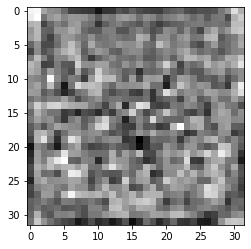

In [50]:
#Class 0 --> airplane
plt.imshow(best_class_0_weights_without_b,'gray') 
plt.show()  

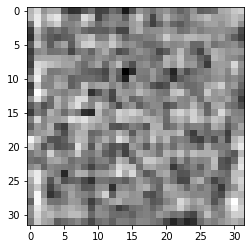

In [51]:
#Class 1 --> automobile
plt.imshow(best_class_1_weights_without_b,'gray') 
plt.show()  

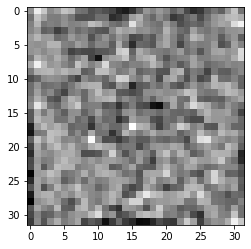

In [52]:
#Class 2 --> bird
plt.imshow(best_class_2_weights_without_b,'gray') 
plt.show()  

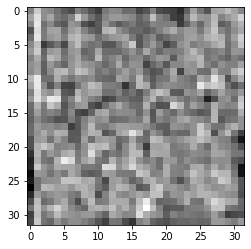

In [53]:
#Class 3 --> cat
plt.imshow(best_class_3_weights_without_b,'gray') 
plt.show()  

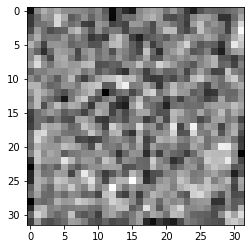

In [54]:
#Class 4 --> deer
plt.imshow(best_class_4_weights_without_b,'gray') 
plt.show()  

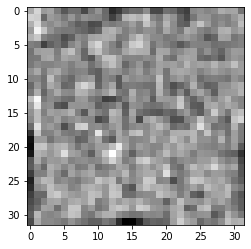

In [55]:
#Class 5 --> dog
plt.imshow(best_class_5_weights_without_b,'gray') 
plt.show()  

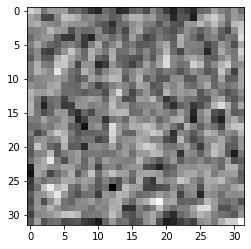

In [56]:
#Class 6 --> frog
plt.imshow(best_class_6_weights_without_b,'gray') 
plt.show()  

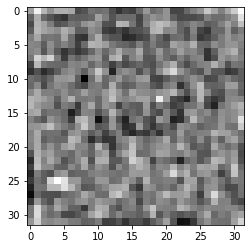

In [57]:
#Class 7 --> horse
plt.imshow(best_class_7_weights_without_b,'gray') 
plt.show()  

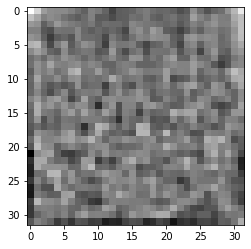

In [58]:
#Class 8 --> ship
plt.imshow(best_class_8_weights_without_b,'gray') 
plt.show()  

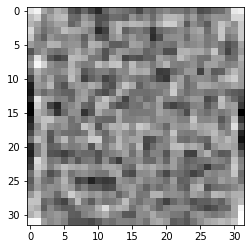

In [59]:
#Class 9 --> truck
plt.imshow(best_class_9_weights_without_b,'gray') 
plt.show()  

In [69]:
#Converting all the weight vectors (including bias) to a single matrix
WEIGHTS = np.concatenate((best_class_0_weights,best_class_1_weights,best_class_2_weights,best_class_3_weights,best_class_4_weights,
                best_class_5_weights,best_class_6_weights,best_class_7_weights,best_class_8_weights,best_class_9_weights),axis=1)

In [70]:
WEIGHTS.shape

(1025, 10)

In [72]:
#Adding an "one" column to the test data
M = len(test_batch_data)
one = np.ones((M,1))
X = np.concatenate((test_batch_data,one), axis=1)
X.shape

(10000, 1025)

In [108]:
#the probability matrix with all the probabilities
Probs = sigmoid(X,WEIGHTS)
Probs

array([[9.99999733e-01, 4.00648112e-17, 2.16768393e-04, ...,
        9.99976591e-01, 1.00000000e+00, 5.76699466e-08],
       [2.94680353e-04, 9.99995853e-01, 1.01889131e-19, ...,
        1.25892769e-33, 1.00000000e+00, 1.00000000e+00],
       [2.47568703e-07, 3.64214167e-04, 2.59421208e-11, ...,
        1.52613667e-22, 1.00000000e+00, 1.00000000e+00],
       ...,
       [7.14619559e-06, 4.66673133e-25, 2.46813698e-03, ...,
        9.89258530e-01, 1.26049129e-09, 6.48119254e-13],
       [1.35645159e-09, 9.99790345e-01, 6.48589682e-07, ...,
        1.23956472e-28, 1.25326519e-09, 6.93973825e-03],
       [6.98572182e-13, 2.87151842e-16, 4.62898889e-19, ...,
        9.14803356e-01, 1.20126315e-08, 8.23515116e-23]])

In [76]:
Probs.shape

(10000, 10)

In [109]:
#finding the label corresponding to the maximum probability
predicted_labels_final = np.argmax(Probs, axis=1)
predicted_labels_final

array([8, 9, 8, ..., 5, 3, 7])

In [110]:
#converting the predicted labels to a list for better handling
predicted_labels_final = predicted_labels_final.tolist()

In [117]:
#creating confusion matrix
CONFUSION_MATRIX = np.zeros((10,10))
dummy = 0
for i in test_batch_labels:
  CONFUSION_MATRIX[i,predicted_labels_final[dummy]] = CONFUSION_MATRIX[i,predicted_labels_final[dummy]] + 1
  dummy = dummy + 1

  

CONFUSION_MATRIX

array([[184., 132.,  64.,  37.,  45.,  54.,  47., 104., 186., 147.],
       [ 46., 399.,  15.,  20.,  23.,  18.,  49.,  44., 137., 249.],
       [136., 123., 116.,  47.,  68.,  87.,  84.,  85., 147., 107.],
       [ 81., 143.,  72., 114.,  64., 144.,  72.,  76., 116., 118.],
       [ 76.,  97.,  69.,  55., 135., 118.,  97.,  80., 137., 136.],
       [ 95.,  87.,  65.,  79.,  73., 255.,  66.,  58., 121., 101.],
       [ 51., 158.,  28.,  51.,  77., 100., 170.,  62., 134., 169.],
       [ 86., 101.,  52.,  42.,  83.,  67.,  78., 192., 160., 139.],
       [ 70., 128.,  25.,  32.,  20.,  63.,  36.,  32., 430., 164.],
       [ 40., 248.,  20.,  15.,  17.,  20.,  31.,  33., 164., 412.]])

In [119]:
Accuracy_final = sum(CONFUSION_MATRIX.diagonal())/10000
Accuracy_final

0.2407